## 聚类方法




### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [5]:
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [7]:
iris = datasets.load_iris()

In [8]:
gt = iris['target']
gt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# 挑选其中的 2个维度

iris['data'][:,:2].shape

(150, 2)

In [10]:
data = iris['data'][:,:2]

In [11]:
x = data[:,0]
y = data[:,1]

(4.0, 8.0)

(1.0, 5.0)

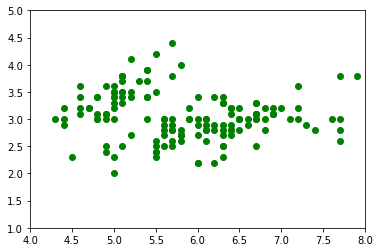

In [12]:
plt.scatter(x, y, color='green')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [15]:
# kmeans

        
        
        
        
        
        
        
        

In [16]:
clu = Kmeans(3)
points_set, centers = clu.fit(data)

In [17]:
centers

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

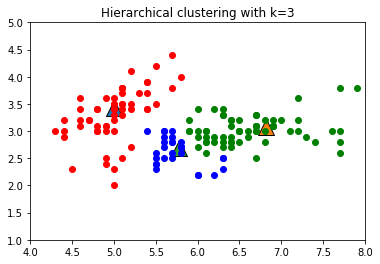

In [18]:
# visualize result

cat1 = np.asarray(points_set[0])
cat2 = np.asarray(points_set[1])
cat3 = np.asarray(points_set[2])

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [14]:
# using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100).fit(data)
gt_labels__ = kmeans.labels_
centers__ = kmeans.cluster_centers_

In [15]:
gt_labels__

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [16]:
centers__

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

Text(0.5, 1.0, 'kmeans using sklearn with k=3')

(4.0, 8.0)

(1.0, 5.0)

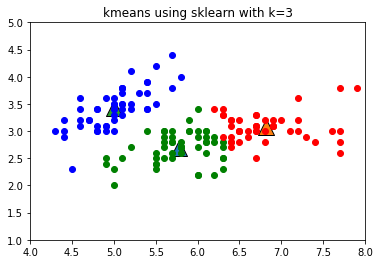

In [18]:
# visualize result

cat1 = data[gt_labels__ == 0]
cat2 = data[gt_labels__ == 1]
cat3 = data[gt_labels__ == 2]

for ix, p in enumerate(centers__):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1[:,0], cat1[:,1], color='green')
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')
plt.title('kmeans using sklearn with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

#### 寻找 K 值

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'K with loss')

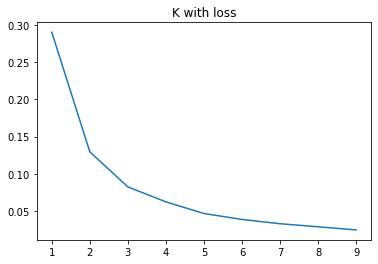

In [19]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data)
    loss.append(kmeans.inertia_ / len(data) / 3)

plt.title('K with loss')
plt.plot(range(1, 10), loss)
plt.show()

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复次操作知道满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。

In [3]:
group_list=[ [i] for i in range(5)]
group_list

del group_list[1]

group_list

[[0], [1], [2], [3], [4]]

[[0], [2], [3], [4]]

In [11]:
my = Hierarchical(3)
my.fit(data)
labels = np.array(my.labels)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


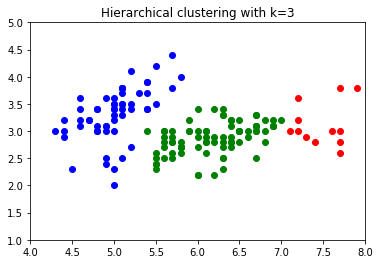

In [12]:
# visualize result

cat1 = data[np.where(labels==0)]
cat2 = data[np.where(labels==1)]
cat3 = data[np.where(labels==2)]

plt.scatter(cat1[:,0], cat1[:,1], color='green')
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [11]:
sk = cluster.AgglomerativeClustering(3)
sk.fit(data)
labels_ = sk.labels_
print(labels_)

AgglomerativeClustering(n_clusters=3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


Text(0.5, 1.0, 'Hierarchical clustering with k=3')

(4.0, 8.0)

(1.0, 5.0)

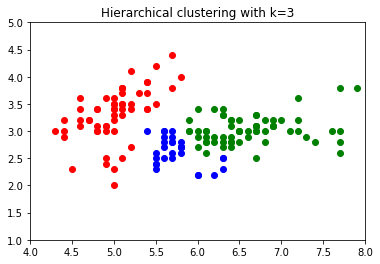

In [12]:
# visualize result of sklearn

cat1_ = data[np.where(labels_==0)]
cat2_ = data[np.where(labels_==1)]
cat3_ = data[np.where(labels_==2)]

plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------